## Observations and Insights 
<!-- The first observation that can be made is that the scientists that ran this experiment used almost an equal amount of male to female mice ratio. By doing so, the data would be more accurate because they could say that the treatment regimen had similar effects on both genders.

Looking at the bar chart, there are two treatment regimens that had a near equal amount of mice tested. The rest of the treatment regimens were mostly equal in the amount of mice tested. This shows that while the scientists did want to test a wide range of treatment regimens, the top two that were part of their main focus were Capomulin and Ramicane.

The bar chart also shows that the scientists tried to pair treatment regimens when they did their testing on the mice. By pairing off the tests, the treatments that may have had similar effects with each other could be seen in the data.  --> -->

In [414]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how ="left")

# Display the data table for preview
combined_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [314]:
# Checking the number of mice.
mice_count = combined_data_df["Mouse ID"].nunique()
mice_count

249

In [315]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicates = combined_data_df[combined_data_df["Mouse ID"].duplicated()]
mice_duplicates.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21


In [316]:
# Optional: Get all the data for the duplicate mouse ID. 
one_mouse_display = mice_duplicates.sort_values(by = "Mouse ID", ascending = True)
one_mouse_display.head(9)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1295,a203,25,56.793208,1,Infubinol,Female,20,23
389,a203,5,48.508468,0,Infubinol,Female,20,23
1804,a203,45,67.973419,2,Infubinol,Female,20,23
758,a203,15,52.777870,1,Infubinol,Female,20,23
1315,a203,30,59.523197,1,Infubinol,Female,20,23
598,a203,10,51.852437,1,Infubinol,Female,20,23
1018,a203,20,55.173336,1,Infubinol,Female,20,23
1675,a203,40,63.593490,2,Infubinol,Female,20,23
1577,a203,35,61.931650,2,Infubinol,Female,20,23


In [317]:
#Getting the mice ID's to put into a DF
mice = combined_data_df["Mouse ID"].unique()
mice

array(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
      

In [318]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_id_list = pd.Series(['b128', 'f932', 'g107', 'a457', 'c819', 'h246', 'p189', 'n923',
       'q119', 'f993', 'z234', 'b559', 'y260', 'x930', 'o725', 'z969',
       'v835', 'r604', 'n304', 'l700', 'x336', 'l725', 'm133', 'v295',
       'a818', 'y601', 't724', 'k382', 'w422', 'c326', 'c139', 'v339',
       'a577', 'y163', 'k483', 'k804', 'o809', 'z581', 'a251', 'i386',
       'c580', 'q132', 'u327', 'v603', 'f278', 'g497', 'd474', 'o973',
       'c832', 'o331', 'm650', 'v289', 'm550', 'h428', 'r701', 'v199',
       'x264', 'f234', 'c458', 'q610', 'j913', 'a411', 'a444', 'd251',
       'j989', 'y449', 'k403', 'c758', 'x402', 'r811', 'a644', 'i177',
       'g791', 'a520', 'u196', 'm546', 'w678', 'n364', 's508', 'e662',
       'z578', 'r921', 'a492', 'w540', 'v764', 'z795', 'e291', 'e584',
       'e213', 'j755', 's565', 'a366', 'p387', 'b879', 'i901', 'k862',
       'g867', 's619', 'w697', 'j984', 'c402', 'h333', 'k510', 'p981',
       't451', 'a963', 'm269', 'g989', 'z314', 'o848', 'v719', 'q597',
       'c895', 'a203', 'f394', 'c264', 'n967', 'f545', 'k894', 'k754',
       'g296', 'd164', 'w575', 'x613', 'q633', 'b313', 'f129', 'j365',
       'p136', 'c559', 'a788', 's337', 'q511', 'm331', 'o926', 'd133',
       'n630', 'a401', 'w350', 'c302', 'a897', 'j235', 'q787', 'a262',
       'r850', 'i669', 'n763', 's152', 'c766', 'e227', 'c282', 'v989',
       'w140', 'v409', 'l872', 'o795', 'y478', 'q582', 's166', 'x773',
       'w167', 't718', 'o302', 'i477', 'c757', 't994', 'p310', 'a699',
       'k603', 'x822', 'l558', 'l733', 'f436', 'l490', 'b759', 'l471',
       'y865', 'y769', 'l661', 'j296', 'u149', 'u153', 'w151', 'h531',
       'a685', 'o813', 'm756', 'n671', 's121', 'v766', 'w193', 'e476',
       'w584', 'b447', 'k210', 'a275', 'x581', 'n482', 't198', 'l215',
       's141', 'o523', 'i635', 'w746', 'r107', 's187', 'g570', 'x209',
       'x111', 'z435', 'n678', 'g558', 'u946', 'o562', 'v991', 'c927',
       'x226', 'p438', 'b487', 'o287', 'q483', 't573', 'f345', 'i334',
       'l264', 'j246', 'r554', 's185', 'b742', 'x401', 'l509', 's710',
       'r157', 'u364', 'j119', 'v923', 'w914', 'i738', 'r944', 'y793',
       'g316', 'g288', 'l897', 'w150', 't565', 'i557', 'm957', 'f966',
       'm601'])
dropped_duplicates_df = mice_duplicates[mice_duplicates["Mouse ID"].isin(mice_id_list)]
dropped_duplicates_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
250,a275,5,46.795257,0,Ceftamin,Female,20,28
251,w575,5,48.913860,1,Zoniferol,Female,16,28
252,x822,5,45.671104,1,Ceftamin,Male,3,29
253,l509,5,45.851193,0,Capomulin,Male,17,21
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [319]:
# Checking the number of mice in the clean DataFrame.
second_mice_count = dropped_duplicates_df["Mouse ID"].nunique()
second_mice_count

237

## Summary Statistics

In [357]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


tumor_volume_median = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_mean = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_volume_var = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_volume_stddev = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_volume_sem = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#Table of the statistics
tumor_data = {"Mean Tumor Volume" : tumor_volume_mean,
              "Median Tumor Volume" : tumor_volume_median,
              "Tumor Volume Variance" : tumor_volume_var,
              "Tumor Volume Std. Dev" : tumor_volume_stddev,
              "Tumor Volume Std. Err." : tumor_volume_sem
             }

tumor_data

{'Mean Tumor Volume': Drug Regimen
 Capomulin    40.148392
 Ceftamin     53.831559
 Infubinol    54.173160
 Ketapril     56.805521
 Naftisol     55.780565
 Placebo      55.481270
 Propriva     53.668609
 Ramicane     39.627674
 Stelasyn     55.644586
 Zoniferol    54.548052
 Name: Tumor Volume (mm3), dtype: float64,
 'Median Tumor Volume': Drug Regimen
 Capomulin    40.716428
 Ceftamin     52.847559
 Infubinol    53.244458
 Ketapril     56.098998
 Naftisol     54.234502
 Placebo      53.354528
 Propriva     52.663801
 Ramicane     39.769552
 Stelasyn     54.328317
 Zoniferol    53.287287
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume Variance': Drug Regimen
 Capomulin    25.434058
 Ceftamin     34.725752
 Infubinol    38.326085
 Ketapril     60.485143
 Naftisol     60.794406
 Placebo      55.762387
 Propriva     38.438982
 Ramicane     23.213127
 Stelasyn     53.476333
 Zoniferol    43.708157
 Name: Tumor Volume (mm3), dtype: float64,
 'Tumor Volume Std. Dev': Drug Regimen
 

In [358]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor_data_df = pd.DataFrame(tumor_data, columns =["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance",
                                                   "Tumor Volume Std. Dev", "Tumor Volume Std. Err."])
tumor_data_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.148392,40.716428,25.434058,5.043219,0.352234
Ceftamin,53.831559,52.847559,34.725752,5.892856,0.476409
Infubinol,54.173160,53.244458,38.326085,6.190806,0.500497
Ketapril,56.805521,56.098998,60.485143,7.777219,0.609159
Naftisol,55.780565,54.234502,60.794406,7.797077,0.614496
Placebo,55.481270,53.354528,55.762387,7.467422,0.597872
Propriva,53.668609,52.663801,38.438982,6.199918,0.531639
Ramicane,39.627674,39.769552,23.213127,4.818000,0.338157
Stelasyn,55.644586,54.328317,53.476333,7.312751,0.583621


## Bar and Pie Charts

In [359]:
#Create the data to extract info from
mice_and_drug = dropped_duplicates_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].count()
mice_and_drug


Drug Regimen
Capomulin    205
Ceftamin     153
Infubinol    153
Ketapril     163
Naftisol     161
Placebo      156
Propriva     136
Ramicane     203
Stelasyn     157
Zoniferol    157
Name: Tumor Volume (mm3), dtype: int64

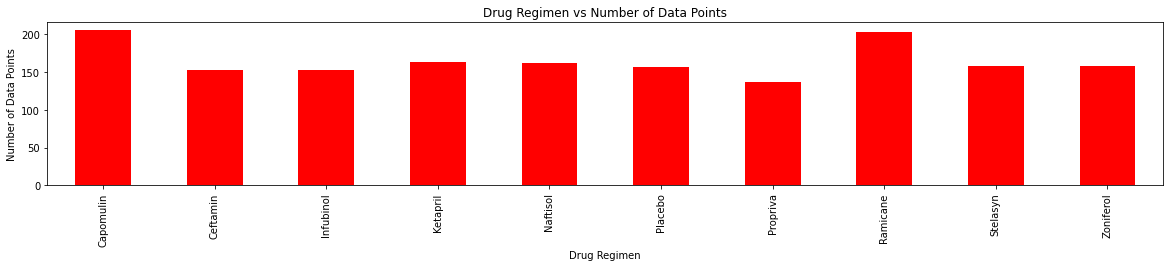

<Figure size 432x288 with 0 Axes>

In [360]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
mice_and_drug.plot(kind="bar", figsize=(20,3), color="r")
plt.ylabel("Number of Data Points")
plt.title("Drug Regimen vs Number of Data Points")
plt.show()
plt.tight_layout()

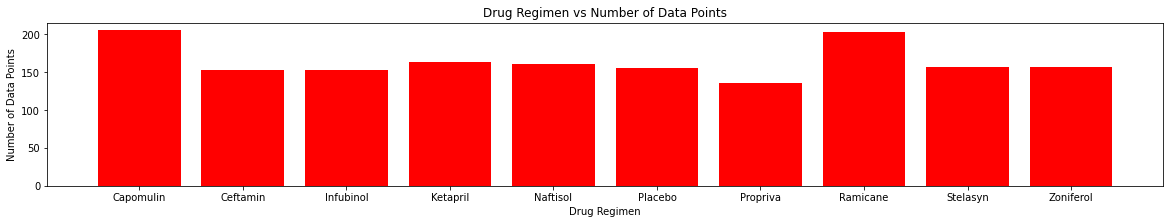

In [361]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
x_axis = np.arange(len(mice_and_drug))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(drug_list, mice_and_drug, color="r", alpha=1.0)
plt.title("Drug Regimen vs Number of Data Points")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()

In [362]:
#Create data for male/female to extract info
mice_gender = dropped_duplicates_df.groupby("Sex")["Sex"].count()
mice_gender

Sex
Female    811
Male      833
Name: Sex, dtype: int64

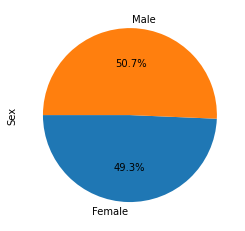

<Figure size 432x288 with 0 Axes>

In [363]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender.plot(kind="pie", autopct="%1.1f%%", startangle = 180)
plt.show()
plt.tight_layout()


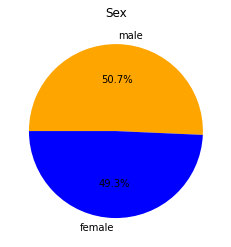

In [364]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["male", "female"]
title = ["sex"]
sizes = [50.7, 49.3]
colors = ["orange", "blue"]
explode = (0.0,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=180, counterclock = False)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [365]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint = dropped_duplicates_df.groupby("Drug Regimen")["Timepoint"].max()
timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
data= {'Drug Regimen' : ['Capomulin','Ramicane','Infubinol','Ceftamin'],
               'Timepoint': [45, 45, 45, 45]}
timepoint_df = pd.DataFrame(data, columns =["Drug Regimen","Timepoint"])
timepoint_df = timepoint_df.reset_index()
timepoint_df


,index,Drug Regimen,Timepoint
0,0,Capomulin,45
1,1,Ramicane,45
2,2,Infubinol,45
3,3,Ceftamin,45


In [366]:
#merging the new DF with the old file
new_table_df = pd.merge(dropped_duplicates_df, timepoint_df, on = "Timepoint", how ="left")
new_table_df.sort_values(by = "Timepoint", ascending = False).head()
new_table_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_x,Sex,Age_months,Weight (g),index,Drug Regimen_y
0,g989,0,45.000000,0,Propriva,Female,21,26,NaN,NaN
1,a275,5,46.795257,0,Ceftamin,Female,20,28,NaN,NaN
2,w575,5,48.913860,1,Zoniferol,Female,16,28,NaN,NaN
3,x822,5,45.671104,1,Ceftamin,Male,3,29,NaN,NaN
4,l509,5,45.851193,0,Capomulin,Male,17,21,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2029,x773,45,58.634971,4,Placebo,Female,21,30,3.0,Ceftamin
2030,b879,45,72.555239,2,Stelasyn,Female,4,26,0.0,Capomulin
2031,b879,45,72.555239,2,Stelasyn,Female,4,26,1.0,Ramicane
2032,b879,45,72.555239,2,Stelasyn,Female,4,26,2.0,Infubinol


In [382]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
specific_tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartiles = new_table_df.quartiles([0.25,0.50,0.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq - lowerq
# median = quartiles[0.5]

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    new_table_df = new_table_df.loc("Drug Regimen_y")
    specific_tumor_volumes.append("Tumor Volume (mm3)")
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Capomulin's potential outliers: lower bound is {lower_bound}, and upper bound is {upper_bound}")
    print(f"Ramicane's potential outliers: lower bound is {lower_bound}, and upper bound is {upper_bound}")
    print(f"Infubinol's potential outliers: lower bound is {lower_bound}, and upper bound is {upper_bound}")
    print(f"Ceftamin's potential outliers: lower bound is {lower_bound}, and upper bound is {upper_bound}")

ValueError: No axis named Drug Regimen_y for object type DataFrame

TypeError: cannot perform reduce with flexible type

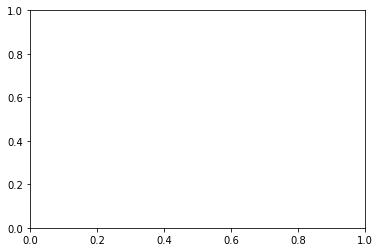

In [383]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title = ('Four Regimens')
ax1.set_ylabel = ('Final Tumor Volume (mm3)')
ax1.boxplot(treatments)
plt.show()

## Line and Scatter Plots

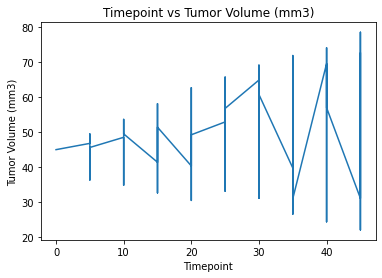

In [399]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


plt.plot(new_table_df["Timepoint"], new_table_df["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Timepoint vs Tumor Volume (mm3)")
plt.show()

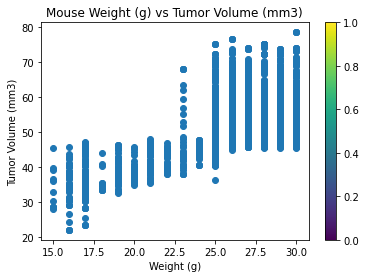

In [395]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(new_table_df["Weight (g)"], new_table_df["Tumor Volume (mm3)"])
clb = plt.colorbar()
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The r-squared is: 0.4595604517161441


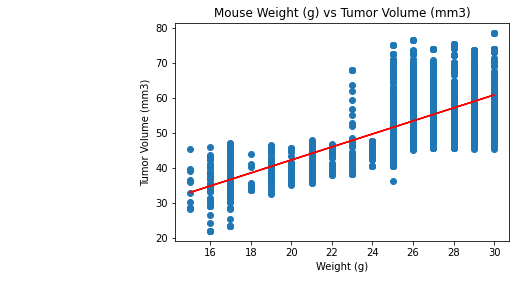

In [418]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


x_values = new_table_df["Weight (g)"]
y_values = new_table_df["Tumor Volume (mm3)"]
(slope,intercept,rvalue,pvalue,stderr)= linregress(x_values, y_values)
regress_values = x_values*slope+intercept
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight (g) vs Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [417]:
#Calcultion of the coefficient
weight=new_table_df.iloc[:,7]
tumor=new_table_df.iloc[:,2]
correlation = st.pearsonr(weight,tumor)
print(f"The correlation between mouse weight and the tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the tumor volume is 0.68
